### Download Dataset 

In [3]:
import os
import numpy as np

# install PhysioNet ecg data package 
import wfdb

# list of available datasets
dbs = wfdb.get_dbs()
display(dbs)

# we choose svdb
svdb_dir = os.path.join(os.getcwd(), 'svdb_dir')
wfdb.dl_database('svdb', dl_dir=svdb_dir)

# Display the  downloaded content   
svdb_in_files = [os.path.splitext(f)[0] for f in os.listdir(svdb_dir) if f.endswith('.dat')]
print(svdb_in_files)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid use and related contexts from MIMIC-III Critical Care Database discharge summaries'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['auditory-eeg', 'Auditory evoked potential EEG-Biometric dataset'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify ch

Generating record list for: 800
Generating record list for: 801
Generating record list for: 802
Generating record list for: 803
Generating record list for: 804
Generating record list for: 805
Generating record list for: 806
Generating record list for: 807
Generating record list for: 808
Generating record list for: 809
Generating record list for: 810
Generating record list for: 811
Generating record list for: 812
Generating record list for: 820
Generating record list for: 821
Generating record list for: 822
Generating record list for: 823
Generating record list for: 824
Generating record list for: 825
Generating record list for: 826
Generating record list for: 827
Generating record list for: 828
Generating record list for: 829
Generating record list for: 840
Generating record list for: 841
Generating record list for: 842
Generating record list for: 843
Generating record list for: 844
Generating record list for: 845
Generating record list for: 846
Generating record list for: 847
Generati

### Creating Dataset

In [4]:
time_window = 48
all_beats = []
all_annotations = []
for in_file in svdb_in_files:
    signal, fields = wfdb.rdsamp(os.path.join(svdb_dir,in_file), channels=[0])
    annotations = wfdb.rdann(os.path.join(svdb_dir,in_file), 'atr')
    signal=np.array(signal).flatten()
    # grab subsequent heartbeats within [position-48,position+48] window
    beats = np.zeros((len(annotations.sample[5:-5]), time_window*2))
    # note that we remove first and last few beats to ensure that all beats have equal lengths
    for i, ann_position in enumerate(annotations.sample[5:-5]):
        beats[i] = signal[ann_position-time_window:ann_position+time_window]
    all_beats.append(beats)
    # consequently, we remove first and last few annotations
    all_annotations.append(annotations.symbol[5:-5])

all_beats = np.concatenate(all_beats)
all_annotations = np.concatenate(all_annotations)

# check which annotations are usable for us, are of N or S or V class
indices = [i for i, ann in enumerate(all_annotations) if ann in {'N','S','V'}]
# and get only these
all_beats = all_beats[indices]
all_annotations = np.array([all_annotations[i] for i in indices])

# print data statistics
print(all_beats.shape, all_annotations.shape)
print('no of N beats: ' + str(np.count_nonzero(all_annotations == 'N')))
print('no of S beats: ' + str(np.count_nonzero(all_annotations == 'S')))
print('no of V beats: ' + str(np.count_nonzero(all_annotations == 'V')))

(183707, 96) (183707,)
no of N beats: 161653
no of S beats: 12146
no of V beats: 9908


### Spliting Dataset

       Label                                                Val
0          N  [0.01, -0.01, -0.01, 0.0, 0.01, 0.01, -0.02, 0...
1          N  [0.16, 0.18, 0.18, 0.16, 0.17, 0.19, 0.18, 0.1...
2          N  [0.06, 0.06, 0.06, 0.05, 0.04, 0.04, 0.03, 0.0...
3          N  [0.04, 0.03, 0.03, 0.01, 0.02, 0.02, 0.03, 0.0...
4          N  [0.05, 0.08, 0.07, 0.07, 0.07, 0.08, 0.08, 0.1...
...      ...                                                ...
183702     S  [-0.655, -0.645, -0.635, -0.615, -0.635, -0.63...
183703     N  [-0.145, -0.155, -0.135, -0.145, -0.095, -0.11...
183704     S  [-0.205, -0.205, -0.135, -0.185, -0.195, -0.23...
183705     N  [-0.115, -0.105, -0.095, -0.075, -0.135, -0.11...
183706     N  [0.155, 0.145, 0.125, 0.145, 0.125, 0.155, 0.1...

[183707 rows x 2 columns]
       Label                                                Val
111770     S  [0.47, -0.02, -0.12, -0.07, -0.16, -0.01, -0.0...
54251      N  [-0.365, -0.37, -0.37, -0.385, -0.405, -0.395,...
27228      N 

/tmp/ipykernel_5225/3973642445.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_v = df.loc[df['Label'] == "V"  ].append(df.loc[df['Label'] == "V"].sample(frac=0.3,random_state=200))
/tmp/ipykernel_5225/3973642445.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_s = df.loc[df['Label'] == "S"].append(df.loc[df['Label'] == "S"].sample(frac=0.5,random_state=200))
/tmp/ipykernel_5225/3973642445.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_n.append(df_s).append(df_v)
/tmp/ipykernel_5225/3973642445.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_n.append(df_s).append(df_v)


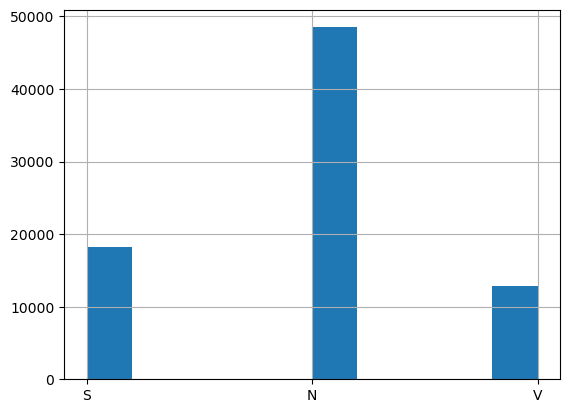

In [5]:
# prepare datasets and define error metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
def calculate_accuracy(y_pred, y_gt, comment='', printout=True):
    y_pred = np.array(y_pred)
    y_gt = np.array(y_gt)
    acc_t = np.count_nonzero(y_pred == y_gt)/len(y_gt)
    acc_a = np.count_nonzero(
        np.logical_and(y_pred == y_gt, y_gt != 'N'))/np.count_nonzero(y_gt != 'N')
    if printout is True:
        print('-----------------------------------')    
        print(comment)
        print('Total accuracy, Acc_T = {:.4f}'.format(acc_t))
        print('Arrhythmia accuracy, Acc_A = {:.4f}'.format(acc_a))
        print('-----------------------------------')
    else: return acc_t, acc_a 
# to simplify experiments and speedup training 
# we take only some part of the whole dataset
X, y = all_beats, all_annotations
import pandas as pd 

df = pd.DataFrame(list(zip(y, X)),columns =['Label', 'Val'])

print(df)

#undersample Normal basts  
df_n = df.loc[df['Label'] == "N"].sample(frac=0.3,random_state=200)

#oversample V class
df_v = df.loc[df['Label'] == "V"  ].append(df.loc[df['Label'] == "V"].sample(frac=0.3,random_state=200))

#oversample V class
df_s = df.loc[df['Label'] == "S"].append(df.loc[df['Label'] == "S"].sample(frac=0.5,random_state=200))


df_a = df.loc[df['Label'] != "N"]

df = df_n.append(df_s).append(df_v)
df=df.sample(frac = 1)
print(df)
df["Label"].hist()



In [ ]:
print()

In [6]:


# train/validation/test set splitting 
X_train, X_test, y_train, y_test = train_test_split(list(df["Val"]), list(df["Label"]), test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=0)
print(len(y_train), len(y_val), len(y_test))

# perform data normalization: z = (x - u)/s
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# same for the validation subset
X_val = preprocessing.StandardScaler().fit_transform(X_val)
# and for the test subset
X_test = preprocessing.StandardScaler().fit_transform(X_test)
import pywt

# extract features using different wavelets and simple differences
def extract_features(input_sample):
    out = np.array([])
# sym8
    cA = pywt.downcoef('a', input_sample, 'sym8', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'sym8', level=4, mode='per')
    out = np.append(out,cD)
# db6/9
    cA = pywt.downcoef('a', input_sample, 'db6', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'db6', level=4, mode='per')
    out = np.append(out,cD)
    cA = pywt.downcoef('a', input_sample, 'db9', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'db9', level=4, mode='per')
    out = np.append(out,cD)
# dmey
    cA = pywt.downcoef('a', input_sample, 'dmey', level=4, mode='per')
    out = np.append(out,cA)
    cD = pywt.downcoef('d', input_sample, 'dmey', level=4, mode='per')
    out = np.append(out,cD)

# differences
    differences = np.zeros(16)
    for i, t in enumerate(range(40, 56)):
        differences[i] = input_sample[t+1]-input_sample[t]
    out = np.append(out,differences)
    return out

# collect vector of features for all samples
def data_features(input_data):
    return np.array([extract_features(sample) for sample in input_data])

X_train_ = data_features(X_train)
print(X_train_.shape)
X_test_ = data_features(X_test)
print(X_test_.shape)
# define accuracy

from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf



ohe = OneHotEncoder()

y_train_o = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_o = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

print(y_train_o)
#y_train = ohe.inverse_transform(y_train_o)
#print(y_train)


55715 11940 11940
(55715, 64)
(11940, 64)


2023-04-23 21:15:26.675431: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 21:15:26.945905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 21:15:26.947678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 21:15:28.372608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Today best Classifier

In [7]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=500, 
                             max_depth=10, 
                             class_weight='balanced')
y_pred = rfc.fit(X_train_, y_train).predict(X_test_)
calculate_accuracy(y_pred, y_test, comment='RF with wavelets')



-----------------------------------
RF with wavelets
Total accuracy, Acc_T = 0.8992
Arrhythmia accuracy, Acc_A = 0.8155
-----------------------------------


In [8]:
print(len(y_pred))
print(len(y_test))
from matplotlib import pyplot as plt


calculate_accuracy(y_pred, y_test, comment='RF with wavelets')
from sklearn.metrics import accuracy_score
calculate_accuracy(y_pred,y_test)


11940
11940
-----------------------------------
RF with wavelets
Total accuracy, Acc_T = 0.8992
Arrhythmia accuracy, Acc_A = 0.8155
-----------------------------------
-----------------------------------

Total accuracy, Acc_T = 0.8992
Arrhythmia accuracy, Acc_A = 0.8155
-----------------------------------


### Deep Learning Classifier 

In [9]:
# encoding 

#onehotEnc = preprocessing.OneHotEncoder()
#onehotEnc.fit(new_target.reshape(-1, 1))
#targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
#print("The original data")
#print(y_train)
#print("The transform data using OneHotEncoder")
#print(targets_trans.toarray())



In [42]:

import pandas as pd
import numpy as np

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split



def get_model():
    nclass = 3
    inp = Input(shape=(64, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="same")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="same")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="same")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="same")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
    model.summary()
    return model

model = get_model()
#file_path = "baseline_cnn_ptbdb_transfer_fullupdate.h5"
#checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
#redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
#callbacks_list = [checkpoint, early, redonplat]  # early
#model.load_weights("baseline_cnn_mitbih.h5", by_name=True)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 1)]           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 60, 16)            96        
                                                                 
 conv1d_17 (Conv1D)          (None, 60, 16)            1296      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 30, 16)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 30, 16)            0         
                                                                 
 conv1d_18 (Conv1D)          (None, 28, 32)            1568      
                                                           

In [50]:

history = model.fit(X_train_, y_train_o, epochs=300, verbose=2, validation_split=0.1)
#model.load_weights(file_path)

Epoch 1/300
1567/1567 - 18s - loss: 0.1077 - acc: 0.9369 - val_loss: 0.1238 - val_acc: 0.9341 - 18s/epoch - 12ms/step
Epoch 2/300
1567/1567 - 20s - loss: 0.1072 - acc: 0.9382 - val_loss: 0.1153 - val_acc: 0.9361 - 20s/epoch - 13ms/step
Epoch 3/300
1567/1567 - 15s - loss: 0.1071 - acc: 0.9381 - val_loss: 0.1161 - val_acc: 0.9368 - 15s/epoch - 9ms/step
Epoch 4/300
1567/1567 - 14s - loss: 0.1062 - acc: 0.9393 - val_loss: 0.1191 - val_acc: 0.9359 - 14s/epoch - 9ms/step
Epoch 5/300
1567/1567 - 13s - loss: 0.1069 - acc: 0.9388 - val_loss: 0.1222 - val_acc: 0.9356 - 13s/epoch - 8ms/step
Epoch 6/300
1567/1567 - 14s - loss: 0.1057 - acc: 0.9397 - val_loss: 0.1240 - val_acc: 0.9309 - 14s/epoch - 9ms/step
Epoch 7/300
1567/1567 - 14s - loss: 0.1068 - acc: 0.9382 - val_loss: 0.1182 - val_acc: 0.9384 - 14s/epoch - 9ms/step
Epoch 8/300
1567/1567 - 13s - loss: 0.1053 - acc: 0.9403 - val_loss: 0.1161 - val_acc: 0.9365 - 13s/epoch - 8ms/step
Epoch 9/300
1567/1567 - 13s - loss: 0.1073 - acc: 0.9387 - val

In [51]:

y_pred = model.predict(X_test_)

y_pred = ohe.inverse_transform(y_pred)
y_pred =y_pred.squeeze()

calculate_accuracy(y_pred, y_test, comment='Deep model with wavelets')

374/374 [==============================] - 1s 4ms/step
-----------------------------------
Deep model with wavelets
Total accuracy, Acc_T = 0.9391
Arrhythmia accuracy, Acc_A = 0.8903
-----------------------------------


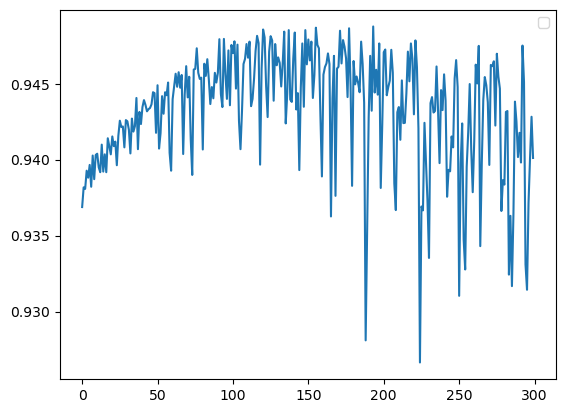

In [54]:



plt.figure()
plt.plot(history.history["acc"])
plt.savefig("300epo")

In [55]:
from tensorflow import keras
model2 = keras.models.load_model("Model_5")